# 0.0 IMPORTS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0.1 HELPER FUNCTIONS

In [2]:
def plot_multiple_years(rpg_games_data4, series_name, year_loop_array):

    plt.figure(figsize=(15,7))

    for year in year_loop_array:    
        
        month_loop_array = np.arange(1,13)
        
        df_ano = rpg_games_data4.loc[rpg_games_data4['release_date'].dt.year == year]
        media_por_mes = data_assembly_per_year(df_ano, month_loop_array, rpg_games_data4['release_date'].dt.month, df_ano[series_name])
        
        plt.plot(month_loop_array, media_por_mes, label=str(year))

    # plt.legend(title='Ano:')
    if (series_name == 'average_estimated_owners_number'):
        plt.yscale('log')
    plt.show()

def check_uniqueness(series):
    
    indexes_array = []    
    for element in series:
        try:
            if (series.value_counts()[element] != 1):
                indexes = series[series == element].index.to_numpy()
                #np.concatenate((indexes_array, indexes))                
                indexes_array.append(indexes)

        except KeyError:
            continue           

    indexes_array = np.concatenate(indexes_array)
    indexes_array = np.unique(indexes_array)
    return indexes_array

def show_descriptive_statistics(df):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean))
    ct2 = pd.DataFrame(df.apply(np.median))    
    ct3 = pd.DataFrame(df.apply(lambda x: x.mode()))

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std))
    d2 = pd.DataFrame(df.apply(min))
    d3 = pd.DataFrame(df.apply(max))
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    d5 = pd.DataFrame(df.apply(lambda x: x.skew()))
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis()))

    m = pd.concat([d2, d3, d4, ct1, ct2, ct3.T, d1, d5, d6], axis=1).reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'mode', 'std', 'skew', 'kurtosis']      
    return m
    
# a função abaixo calcula a média por ano de determinado dado de interesse

def data_assembly_per_year(rpg_games_data, year_loop_array, release_year, target_data_column):
    
    year_data_array_index = []
    for year in year_loop_array:
        year_data_index = rpg_games_data.loc[release_year == year].index
        year_data_array_index.append(year_data_index)

    target_data_per_year = []
    for index in year_data_array_index:
        if np.size(target_data_column[index]) == 0:
            target_data = np.mean(target_data_column[index-1])                                   # revisar essa escolha depois. procurar algo na literatura?
            target_data_per_year.append(target_data)
        
        else:
            target_data = np.mean(target_data_column[index])        
            target_data_per_year.append(target_data)

    return target_data_per_year

## 0.2 PATH DEFINITION

In [3]:
HOME_PATH = '~/projetos_de_estudo/rpg_games_data_analysis'
RAW_DATA_PATH = '/data/raw/'
INTERIM_DATA_PATH = '/data/interim/'
FIGURES_PATH = '/reports/figures/'

## 0.3 LOADING DATA

In [4]:
rpg_games_data_raw = pd.read_csv(HOME_PATH + RAW_DATA_PATH + "rpg_steam_clean.csv")
rpg_games_data_raw

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,October,2019,39.99,"1,000,000","2,000,000","1,500,000",ZA/UM,ZA/UM
1,2,BioShock,August,2007,4.99,"1,000,000","2,000,000","1,500,000","2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),January,2010,19.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,January,2010,29.99,"1,000,000","2,000,000","1,500,000",BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,October,2015,39.99,"1,000,000","2,000,000","1,500,000",Larian Studios,Larian Studios
...,...,...,...,...,...,...,...,...,...,...
10472,10473,Sunrider: Liberation Day - Captain's Edition,March,2016,24.99,"100,000","200,000","150,000",Love in Space,Sekai Project
10473,10474,Niplheim's Hunter - Branded Azel,January,2019,11.99,"20,000","50,000","35,000",Black Train,Kagura Games
10474,10475,PAGUI打鬼,October,2019,19.99,"20,000","20,000","20,000",padendon,padendon
10475,10476,蓝宝石般的被害妄想少女/Damsel with persecutory delusion,November,2018,4.99,"20,000","50,000","35,000",橙光游戏,橙光游戏


# 1.0 DATA DESCRIPTION

In [5]:
rpg_games_data1 = rpg_games_data_raw.copy()
rpg_games_data1.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data1.csv')

## 1.1 DATA FIELDS

Vamos separar os campos de dados relevantes em variáveis separadas, para melhor tratamento e referência a eles ao longo do projeto.

- steam_id_number -> vetor com identificadores únicos dos jogos
- release_month -> mês de lançamento do jogo
- release_year -> ano de lançamento do jogo
- release_price -> preço de lançamento do jogo
- lowest_estimated_owners_number -> o menor número estimado de compradores
- highest_estimated_owners_number -> o maior número estimado de compradores
- average_estimated_owners_number -> o número médio estimado de compradores
- developer -> estúdio de desenvolvimento do jogo
- publisher -> publicador do jogo

## 1.2 RENAME COLUMNS

Renomearíamos os nomes das colunas para um determinado padrão tipográfico, caso elas já não estivessem padronizadas.
Como eles já estão todos num mesmo formato, não faremos nada.

## 1.3 DATA DIMENSIONS

Listaremos as dimensões das colunas, e armazenaremos tais dimensões em variáveis apropriadas.

In [6]:
rpg_games_data1.shape # diagnóstico do tamanho do dataset. isso nos diz que tipo de ferramentas precisaremos usar.

(10477, 10)

## 1.4 DATA TYPES

Verificaremos o tipo das variáveis da seção 1.1.

In [7]:
print(rpg_games_data1.dtypes)

steam_id_number                      int64
game_title                          object
release_month                       object
release_year                         int64
release_price                      float64
lowest_estimated_owners_number      object
highest_estimated_owners_number     object
average_estimated_owners_number     object
developer                           object
publisher                           object
dtype: object


## 1.5 TYPE CHANGES

Trocaremos os tipos das variáveis para tipos mais apropriados. Exemplo: lowest_estimated_owners_number é uma variável numérica, mas está listada como object.
Sendo assim, mudaremos o tipo dela para float64, para sermos capazes de realizar as operações necessárias.
Para esse mesmo objetivo, também mudaremos todas as colunas numéricas para vetores do NumPy.

In [8]:
# Substituindo o caracter ' por vazio nas strings

rpg_games_data1['lowest_estimated_owners_number'] = rpg_games_data1['lowest_estimated_owners_number'].str.replace(',','')
rpg_games_data1['highest_estimated_owners_number'] = rpg_games_data1['highest_estimated_owners_number'].str.replace(',','')
rpg_games_data1['average_estimated_owners_number'] = rpg_games_data1['average_estimated_owners_number'].str.replace(',','')

# Colocando as variáveis numéricas nos tipos apropriados

rpg_games_data1['lowest_estimated_owners_number'] = rpg_games_data1['lowest_estimated_owners_number'].astype('float64')
rpg_games_data1['highest_estimated_owners_number'] = rpg_games_data1['highest_estimated_owners_number'].astype('float64')
rpg_games_data1['average_estimated_owners_number'] = rpg_games_data1['average_estimated_owners_number'].astype('float64')

# Transformando a variável release_month em variável numérica

month_dictionary = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
rpg_games_data1['release_month'] = rpg_games_data1['release_month'].map(month_dictionary)

rpg_games_data1

,steam_id_number,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
0,1,Disco Elysium - The Final Cut,10,2019,39.99,1000000.0,2000000.0,1500000.0,ZA/UM,ZA/UM
1,2,BioShock,8,2007,4.99,1000000.0,2000000.0,1500000.0,"2K Boston, 2K Australia",2K
2,3,Mass Effect 2 (2010),1,2010,19.99,1000000.0,2000000.0,1500000.0,BioWare,Electronic Arts
3,4,Mass Effect 2 Digital Deluxe Edition,1,2010,29.99,1000000.0,2000000.0,1500000.0,BioWare,Electronic Arts
4,5,Divinity: Original Sin - Enhanced Edition,10,2015,39.99,1000000.0,2000000.0,1500000.0,Larian Studios,Larian Studios
...,...,...,...,...,...,...,...,...,...,...
10472,10473,Sunrider: Liberation Day - Captain's Edition,3,2016,24.99,100000.0,200000.0,150000.0,Love in Space,Sekai Project
10473,10474,Niplheim's Hunter - Branded Azel,1,2019,11.99,20000.0,50000.0,35000.0,Black Train,Kagura Games
10474,10475,PAGUI打鬼,10,2019,19.99,20000.0,20000.0,20000.0,padendon,padendon
10475,10476,蓝宝石般的被害妄想少女/Damsel with persecutory delusion,11,2018,4.99,20000.0,50000.0,35000.0,橙光游戏,橙光游戏


## 1.6 CHECK NANS

Checaremos se há valores do tipo NaN (Not a Number) em algum dos vetores numéricos.

In [9]:
print(rpg_games_data1['release_month'].isnull().values.any())
print(rpg_games_data1['release_year'].isnull().values.any())
print(rpg_games_data1['release_price'].isnull().values.any())
print(rpg_games_data1['lowest_estimated_owners_number'].isnull().values.any())
print(rpg_games_data1['highest_estimated_owners_number'].isnull().values.any())
print(rpg_games_data1['average_estimated_owners_number'].isnull().values.any())

False
False
False
False
False
False


## 1.7 FILL OUT NANS


Avaliaríamos como tratar/substituir os NaNs indicados na célula anterior. 
Como não há nenhuma ocorrência, não faremos nada.

## 1.8 DESCRIPTIVE STATISTICS

Calcularemos os seguintes valores para as variáveis (para as quais fizer sentido calcular tais valores):

- média 
- mediana
- moda
- desvio padrão
- skewness
- curtoses
- min
- max
- range

### 1.8.1 NUMERICAL ATTRIBUTES

Calcularemos os valores acima para as seguintes variáveis numéricas:

- release_month
- release_year
- release_price
- lowest_estimated_owners_number
- highest_estimated_owners_number
- average_estimated_owners_number

In [10]:
num_attributes = rpg_games_data1.select_dtypes(include=['int64', 'float64']) # cria um df satisfazendo as condições dos parênteses
num_attributes.drop('steam_id_number', axis=1, inplace=True)
m = show_descriptive_statistics(num_attributes)
m

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,release_month,1.0,1.200000e+01,11.00,6.451370,7.00,8.0,3.375154e+00,-0.008789,-1.185976
1,release_year,1983.0,2.023000e+03,40.00,2018.702109,2019.00,2021.0,3.244091e+00,-2.916066,17.033713
2,release_price,0.0,1.999900e+02,199.99,8.974565,5.99,0.0,1.028449e+01,4.932139,64.554810
3,lowest_estimated_owners_number,20000.0,5.000000e+07,49980000.00,110391.333397,20000.00,20000.0,8.476130e+05,31.268686,1394.494344
4,highest_estimated_owners_number,20000.0,1.000000e+08,99980000.00,228765.868092,20000.00,20000.0,1.902958e+06,28.840845,1088.643687
5,average_estimated_owners_number,20000.0,7.500000e+07,74980000.00,169578.600744,20000.00,20000.0,1.373441e+06,29.465554,1169.075417


### 1.8.2 CATEGORICAL ATTRIBUTES

Verificaremos a cardinalidade para as seguintes variáveis categóricas:

- game_title (para verificar se existem linhas duplicadas na tabela)
- developer
- publisher

In [11]:
cat_attributes = rpg_games_data1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
cat_attributes.apply(lambda x: x.unique().shape[0])

game_title    10477
developer      7758
publisher      6875
dtype: int64

# 2.0 Features Engineering


In [12]:
rpg_games_data2 = rpg_games_data1.copy()
rpg_games_data2.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data2.csv')

## 2.1 Hypothesis Mental Map

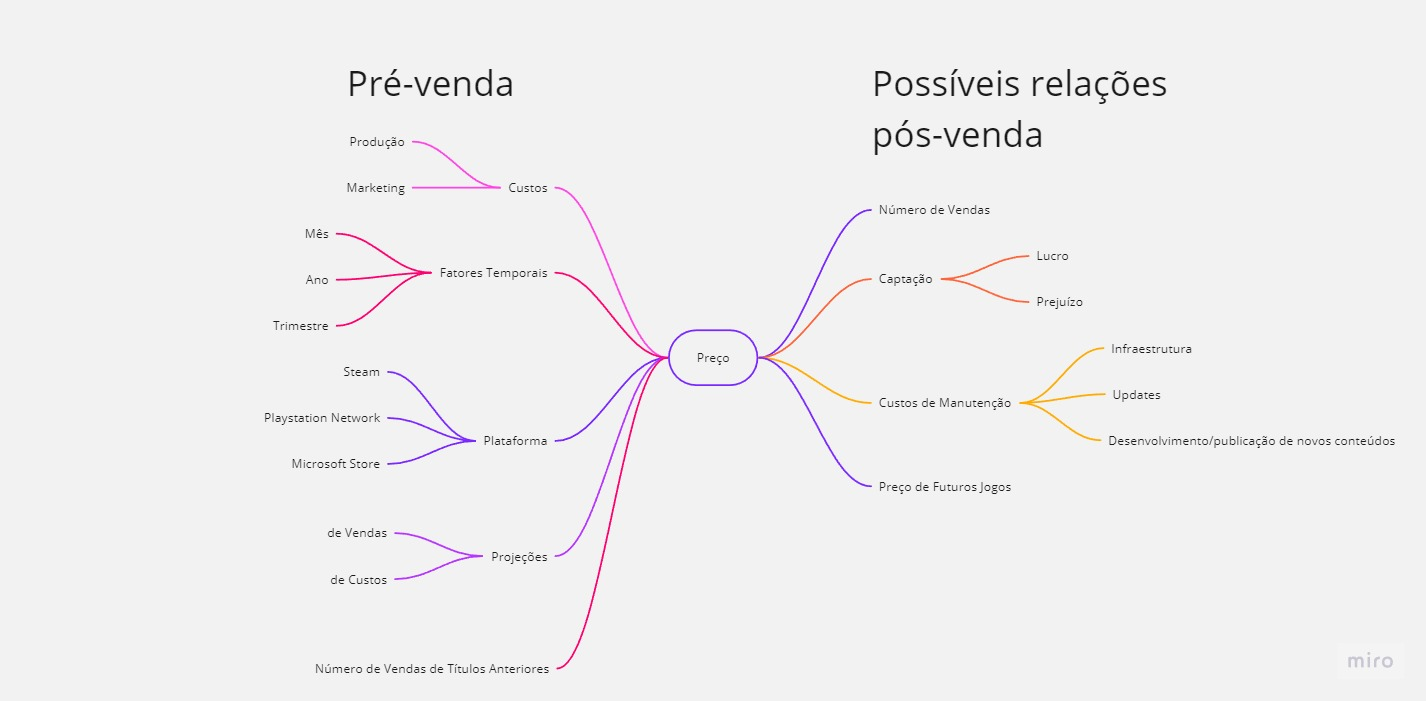

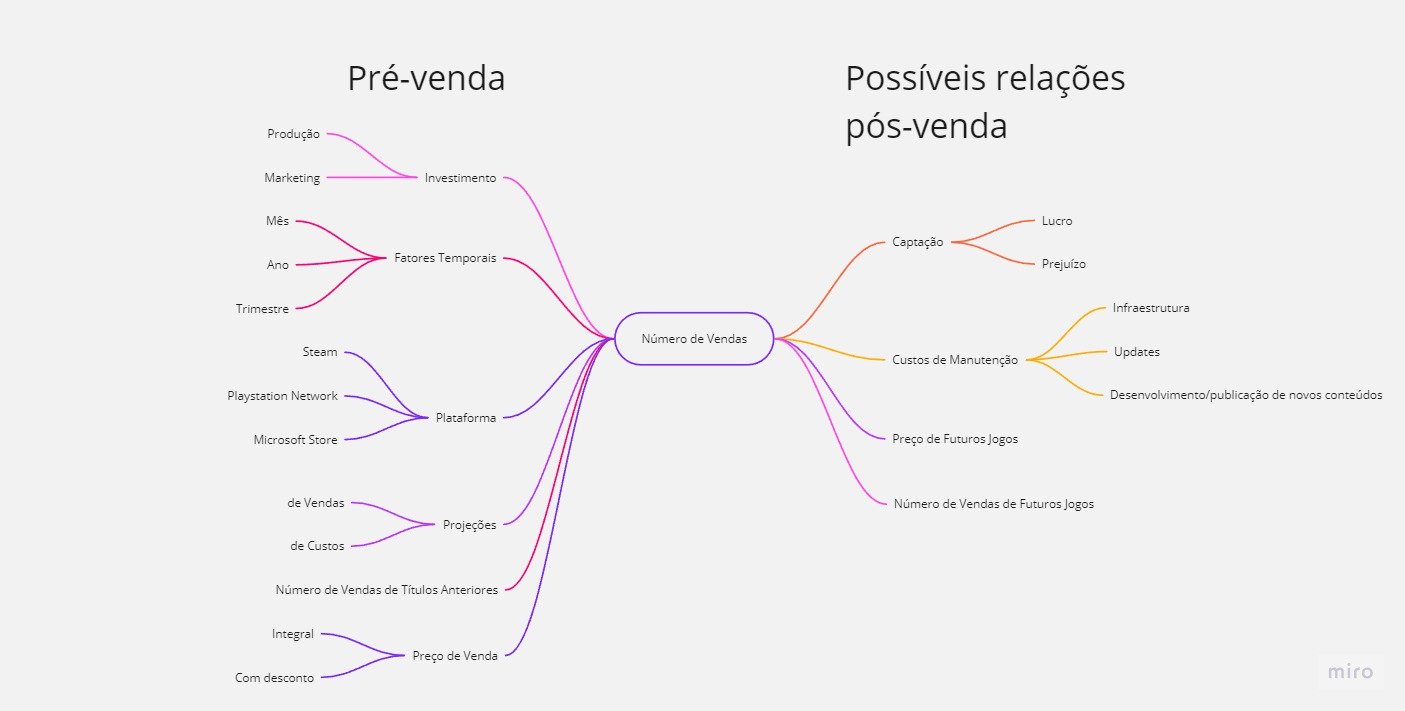

## 2.2 Creating Hypothesis

### 2.2.1 For Pricing

#### 2.2.1.1 Costs Related

- quanto maior o custo de produção, maior o preço do jogo
- quanto maior o custo de marketing, menor o preço do jogo

#### 2.2.1.2 Time Related

- o preço dos jogos aumenta conforme os anos passam
- jogos lançados no Q4 têm maior preço

#### 2.2.1.3 Plataform Related

- os preços de venda são mais baratos se publicados na Steam, em comparação com as outras duas citadas

#### 2.2.1.4 Projection Related

- quanto maior o custo projetado do jogo, maior o preço
- quanto maior o número projetado de vendas, menor o preço

#### 2.2.1.5 Other Factors


- quanto mais cópias um determinado estúdio vendeu no passado, maior o preço de futuros jogos

#### 2.2.1.6 Post Sales

- quanto maior o preço, maior o número de vendas
- quanto maior o preço, maior o preço de futuros jogos
- quanto maior o preço, maior é a captação
- quanto maior o preço, maior o custo de manutenção

### 2.2.2 For Sales

#### 2.2.2.1 Costs Related

- quanto maior o custo de produção, maior o número de vendas
- quanto maior o custo de marketing, maior o número de vendas

#### 2.2.2.2 Time Related

- o número de cópias vendidas aumenta a cada ano
- jogos lançados no Q4 têm maior número de vendas

#### 2.2.2.3 Plataform Related

- Steam é a plataforma que mais vende jogos de RPG

#### 2.2.2.4 Projection Related

- quanto maior o custo projetado do jogo, maior o número de vendas
- quanto maior o número projetado de vendas, maior o número de vendas

#### 2.2.2.5 Price Related

- quanto maior o preço integral, maior o número de vendas
- quanto maior o desconto, maior o número de vendas

#### 2.2.2.6 Other Factors

- quanto mais cópias um determinado estúdio vendeu no passado, maior o número de vendas de jogos futuros

#### 2.2.2.7 Post Sale

- quanto maior o número de vendas, maior o preço de jogos futuros
- quanto maior o número de vendas, maior o número de vendas de jogos futuros
- quanto maior o número de vendas, maior é a captação
- quanto maior o número de vendas, maior o custo de manutenção

## 2.3 Final Hypothesis List

Listaremos aqui as hipóteses que imaginamos serem verificáveis com o _dataset_ atual.

Para preço:

- o preço dos jogos aumenta conforme os anos passam;
- jogos lançados no Q4 têm maior preço;
- quanto mais cópias um determinado estúdio vendeu no passado, maior o preço de futuros jogos;
- quanto maior o preço, maior o número de vendas.

Para vendas:

- o número de cópias vendidas aumenta a cada ano;
- jogos lançados no Q4 têm maior número de vendas;
- quanto maior o preço integral, maior o número de vendas;
- quanto mais cópias um determinado estúdio vendeu no passado, maior o número de vendas de jogos futuros.

Relações pós-venda:

- quanto maior o número de vendas, maior o preço e número de vendas de jogos futuros;
- quanto maior o preço, maior o número de vendas;
- quanto maior o preço, maior o preço de jogos futuros.

## 2.4 Data Questioning

Listaremos aqui algumas perguntas a serem feitas para os dados, a fim de obter _insights_ sobre tendências e padrões.

- qual a evolução do preço de jogos ao longo dos anos?
- e do número de cópias vendidas?
- definindo como 'bons vendedores' os jogos que venderam mais cópias que a média observada, qual é a média de preço entre eles?
- e dos jogos que perfomaram mal?
- qual é a média de cópias vendidas pelos bons vendedores?
- e dos que perfomaram mal?
- qual ano vendeu mais cópias? este número está relacionado com o número de lançamentos?
- qual ano movimentou mais dinheiro?
- qual jogo vendeu o maior número de cópias? este jogo segue uma tendência do seu ano de lançamento, ou é um caso especial?
- qual desenvolvedor teve maior faturamente por jogo? qual o peso das variáveis 'cópias vendidas' e 'preço' para o faturamente?

## 2.5 Feature Engineering - Part I

Para verificação das hipóteses, criaremos os seguintes _features_

- quarter: dividiremos o ano nos trimestres Q1, Q2, Q3 e Q4, representados no dataframe só pelo seu respectivo algarismo
- sales_perfomance: classificaremos os jogos com 0 ou 1, sendo 0 se o jogo vendeu menos cópias que a média, e 1 se vendeu mais
- recurrent_developers: classificaremos os desenvolvedores com 0 ou 1, sendo 0 se só produziu um único jogo, e 1 se produziu mais

Além disso, colocaremos a data no formato de _time series_.

In [13]:
# Criando as colunas para cada variável

quarters = pd.Series(np.zeros(10477), name='quarter')
sales_performance = pd.Series(np.zeros(10477), name='sales_performance')
recurrent_developers = pd.Series(np.zeros(10477), name='recurrent_developers')
release_date = pd.Series(np.zeros(10477), name='release_date')

rpg_games_data2 = rpg_games_data2.join([quarters, sales_performance, recurrent_developers, release_date])

In [14]:
# Setando a variável 'quarter'

rpg_games_data2['quarter'] = rpg_games_data2['release_month'].apply(lambda x: ((x -1)// 3)+1)

In [15]:
# Setando a variável 'sales_performance'

average_sales_mean = 169578.600744
rpg_games_data2['sales_performance'] = rpg_games_data2['average_estimated_owners_number'].apply(lambda x: 1 if (x>average_sales_mean) else 0)

In [16]:
# Setando a variável 'recurrent_developers'

indexes_array = check_uniqueness(rpg_games_data2['developer'])
rpg_games_data2.loc[indexes_array,'recurrent_developers'] = 1

In [17]:
# Colocando em formato padrão de data

rpg_games_data2['release_date'] = rpg_games_data2.apply(lambda row: str(row.release_year) + '-' + str(row.release_month) + '-01' if (row.release_month>9) else str(row.release_year) + '-0' + str(row.release_month) + '-01' , axis=1)
rpg_games_data2['release_date'] = pd.to_datetime(rpg_games_data2['release_date'])

# 3.0 Variable Filtering

In [18]:
rpg_games_data3 = rpg_games_data2.copy()
rpg_games_data3.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data3.csv')

## 3.1 Line Filtering

Apagaremos todas as linhas com data de lançamento anterior a 2005, pois este foi o ano em que jogos de terceiros foram aceitos na Steam.

In [19]:
index_array = rpg_games_data3.loc[rpg_games_data3['release_date'].dt.year <= 2005].index
rpg_games_data3.drop(index_array, axis=0, inplace=True)

## 3.2 Column Selection

Excluíremos as colunas de que não precisaremos nas próximas etapas, a saber:

- game_title
- release_month
- release_year
- lowest_estimated_owners_number
- highest_estimated_owners_number
- developer
- publisher

In [20]:
rpg_games_data3.drop(['game_title', 'release_month', 'release_year', 'lowest_estimated_owners_number', 'highest_estimated_owners_number', 'publisher', 'developer'], axis=1, inplace=True)

# 4.0 EXPLORATORY STATISTICS

In [21]:
rpg_games_data4 = rpg_games_data3.copy()
rpg_games_data4.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data4.csv')

## 4.1 Univariate Analysis (target variable)

### 4.1.1 Whole Dataset Plots

Plotaremos gráficos e visualizações para as seguinte variáveis alvo:

- release_price
- average_estimated_owners_number

(array([9.694e+03, 5.760e+02, 1.100e+02, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 5.000e+00]),
 array([  0.   ,  19.999,  39.998,  59.997,  79.996,  99.995, 119.994,
        139.993, 159.992, 179.991, 199.99 ]),
 <BarContainer object of 10 artists>)

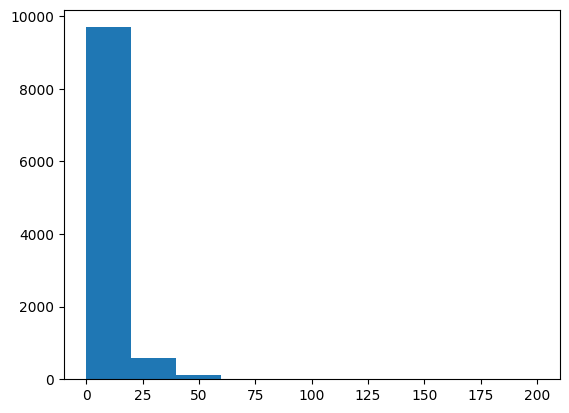

In [22]:
plt.hist(rpg_games_data4['release_price'])

(array([1.0374e+04, 1.0000e+01, 0.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.0000e+04, 7.5180e+06, 1.5016e+07, 2.2514e+07, 3.0012e+07,
        3.7510e+07, 4.5008e+07, 5.2506e+07, 6.0004e+07, 6.7502e+07,
        7.5000e+07]),
 <BarContainer object of 10 artists>)

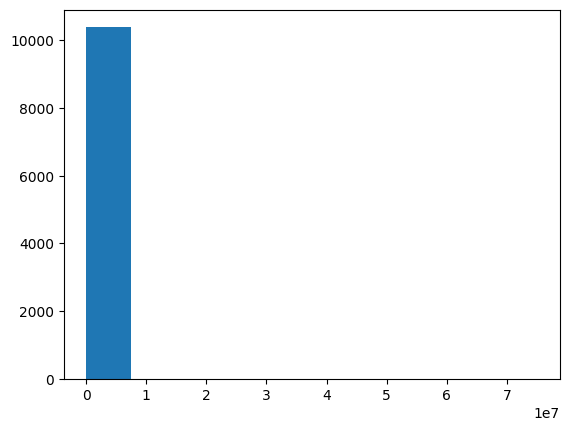

In [23]:
plt.hist(rpg_games_data4['average_estimated_owners_number'])

### 4.1.2 Selected Range Plots

A fim de investigar mais a fundo o _dataset_, escolheremos alguns _ranges_ específicos para plotar os gráficos.

- para o preço de lançamento, plotaremos o histograma para jogos com o preço abaixo de $60. Colocamos essa condição sobre o preço pois só 0,1% dos jogos custam mais que isso;
- para o número de vendas, daremos _zoom in_ progressivamente nos intervalos onde há a maior concentração de _datapoints_.
 

(array([5388., 2357., 1211.,  763.,  427.,   43.,   84.,   13.,   40.,
          54.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

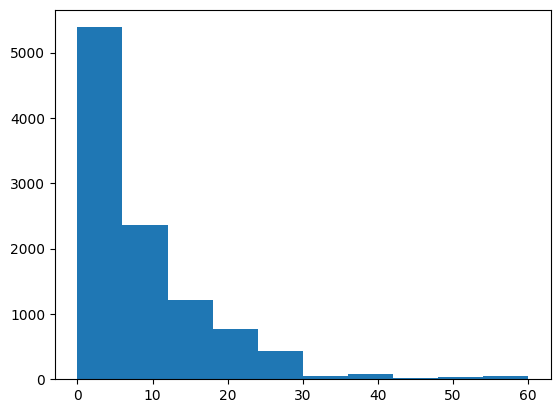

In [24]:
plt.hist(rpg_games_data4['release_price'], range=[0,60])                                                         

# para registro: parece ser Poisson com lambda =< 1
# pode ser geométrica tb (porém a interpretação fica estranha?)

(array([10167.,   122.,     0.,    67.,     0.,     0.,     0.,    18.,
            0.,     0.]),
 array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.,  8000000.,  9000000., 10000000.]),
 <BarContainer object of 10 artists>)

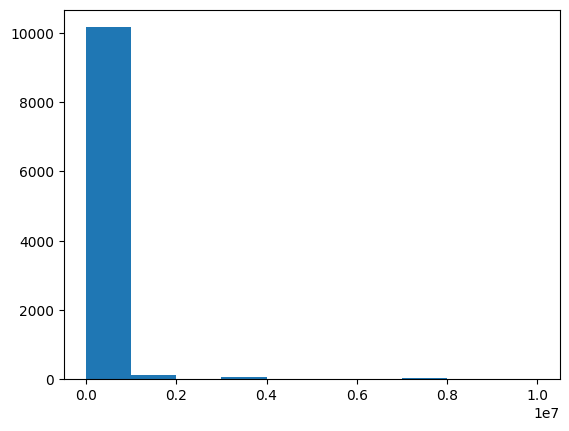

In [25]:
plt.hist(rpg_games_data4['average_estimated_owners_number'], range=[0,10000000])

(array([9430.,  490.,    0.,  247.,    0.,    0.,    0.,  122.,    0.,
           0.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

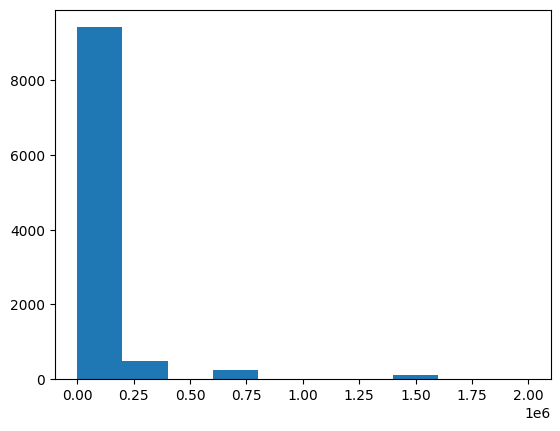

In [26]:
plt.hist(rpg_games_data4['average_estimated_owners_number'], range=[0,2000000])

(array([8074.,  832.,    0.,  524.,    0.,    0.,    0.,  490.,    0.,
           0.]),
 array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000., 500000.]),
 <BarContainer object of 10 artists>)

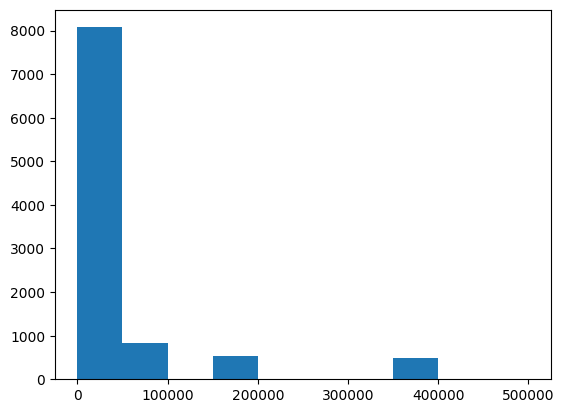

In [27]:
plt.hist(rpg_games_data4['average_estimated_owners_number'], range=[0,500000])

(array([   0.,    0., 6571., 1503.,    0.,    0.,    0.,  832.,    0.,
           0.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

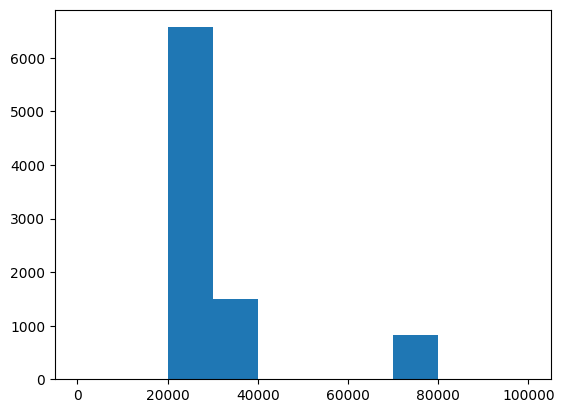

In [28]:
count, bins = np.histogram(rpg_games_data4['average_estimated_owners_number'], range=(0,100000))
plt.hist(rpg_games_data4['average_estimated_owners_number'], range=[0,100000])

In [29]:
(count[2] + count[3])*(100/rpg_games_data4.shape[0]) # porcentagem de jogos que venderam menos de 100k cópias

77.6869046473588

In [30]:
rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1].count()[0]*(100/rpg_games_data4.shape[0]) # porcentagem de jogos que venderam acima da média

9.265852015779851

In [31]:
rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0].count()[0]*(100/rpg_games_data4.shape[0]) # abaixo da média

90.73414798422014

### 4.1.3 Selected Criteria Plots

Aqui, vamos separar algumas visualizações em jogos que perfomaram acima e abaixo da média em vendas.

 

13.448130841121499

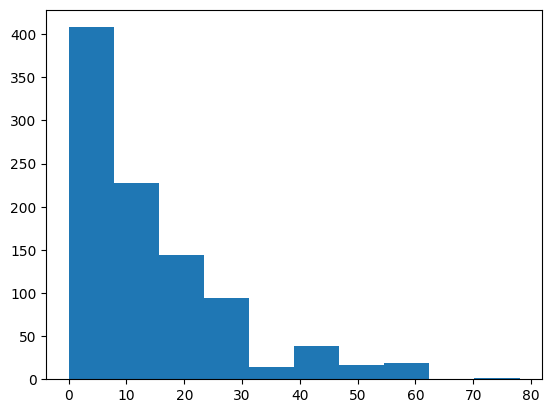

In [32]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['release_price'])
rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['release_price'].mean() # talvez tenhamos que colocar essa média em outra seção

# a média de preço dos jogos que perfomaram bem é cerca de 47% maior que a média total

8.53134994697773

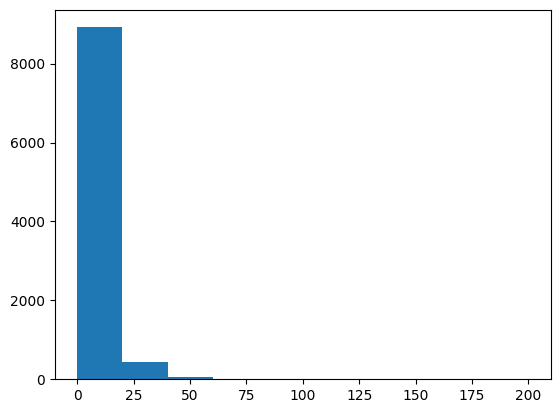

In [33]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['release_price'])
rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['release_price'].mean()

(array([5003., 2199., 1098.,  638.,  335.,   29.,   48.,   10.,   23.,
          35.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

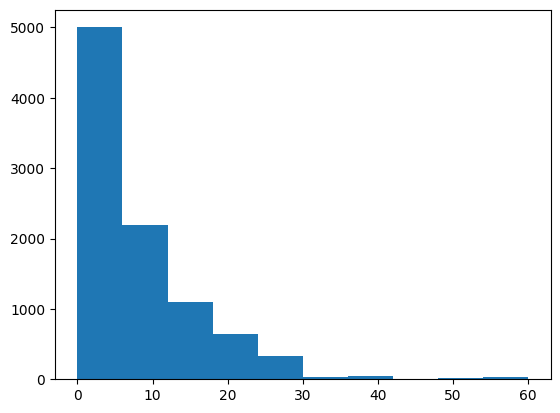

In [34]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['release_price'], range=(0,60))

(array([944.,  10.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   1.]),
 array([  350000.,  7815000., 15280000., 22745000., 30210000., 37675000.,
        45140000., 52605000., 60070000., 67535000., 75000000.]),
 <BarContainer object of 10 artists>)

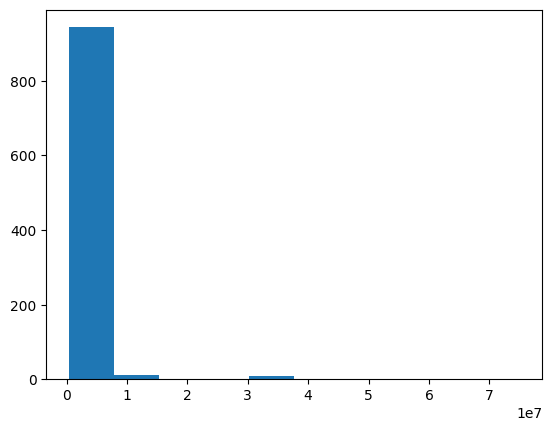

In [35]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number'])

(array([859.,  67.,   0.,  18.,   0.,   0.,   0.,  10.,   0.,   0.]),
 array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000., 14000000., 16000000., 18000000., 20000000.]),
 <BarContainer object of 10 artists>)

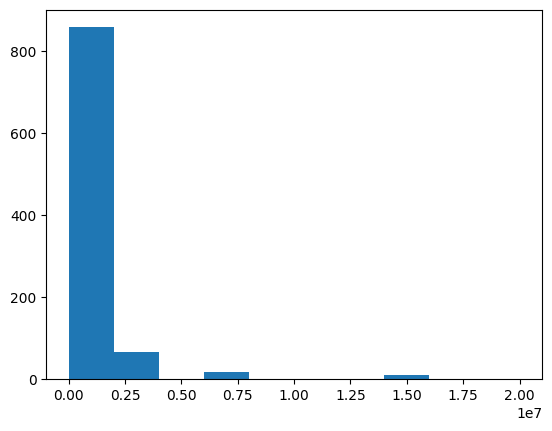

In [36]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number'], range=(0,20000000))

(array([737., 122.,   0.,  67.,   0.,   0.,   0.,  18.,   0.,   0.]),
 array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.,  8000000.,  9000000., 10000000.]),
 <BarContainer object of 10 artists>)

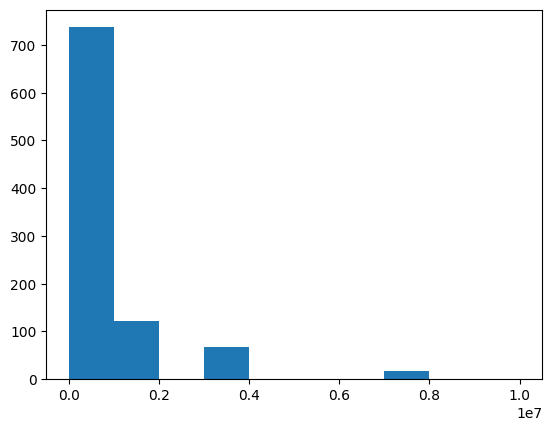

In [37]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number'], range=(0,10000000))

(array([  0., 490.,   0., 247.,   0.,   0.,   0., 122.,   0.,   0.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

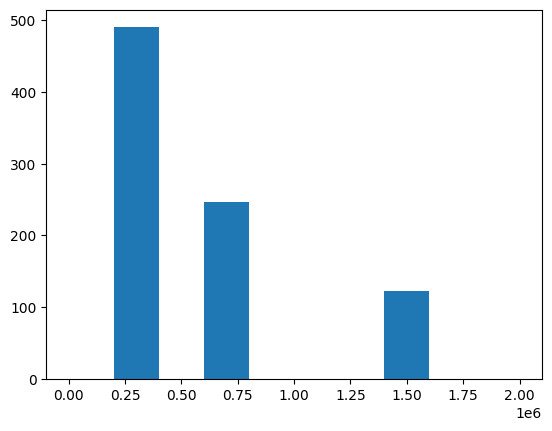

In [38]:
plt.hist(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number'], range=(0,2000000))

In [39]:
rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number'].min() 

# dentre os que perfomaram bem, o menor valor de cópias vendidas para um jogo é de 350k. quase 100% a mais que a média.

350000.0

### 4.1.4 Some Early Conclusions

- 9,3% dos jogos perfomaram acima da média, em termos de venda
- A distribuição de preços para jogos que perfomaram bem parece se comportar como a geral, com alguma diferença de curtose/achatamento.
- A média de preço dos jogos que perfomaram bem é cerca de 47% maior que a média total
- Dentre os que perfomaram bem, o menor valor de cópias vendidas para um jogo é de 350k. Isso representa uma diferença de +106% em relação à média.

## 4.2 Bivariate Analysis

Aqui vamos gerar visualizações bivariadas para os seguintes pares de variáveis (no formato var independende/var dependente)

- average_estimated_owners_number/release_price
- release_price/average_estimated_owners_number
- recurrent_developers/release_price
- recurrent_developers/average_estimated_owners_number
- sales_perfomance/release_price
- sales_perfomance/average_estimated_owners_number
- quarter/release_price
- quarter/average_estimated_owners_number
- time/release_price
- time/average_estimated_owners_number

### 4.2.1 average_estimated_owners_number/release_price

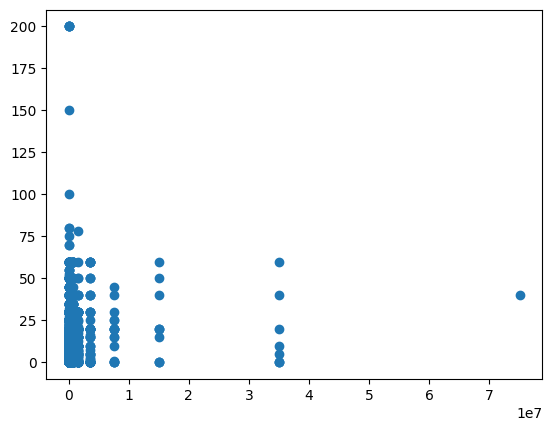

In [40]:
plt.scatter(rpg_games_data4['average_estimated_owners_number'], rpg_games_data4['release_price'])

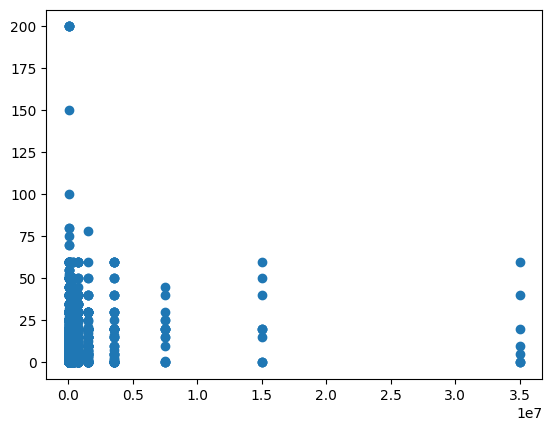

In [41]:
aux_index_array = rpg_games_data4['average_estimated_owners_number'][rpg_games_data4['average_estimated_owners_number'] < 40000000].index
plt.scatter(rpg_games_data4['average_estimated_owners_number'][aux_index_array], rpg_games_data4['release_price'][aux_index_array])

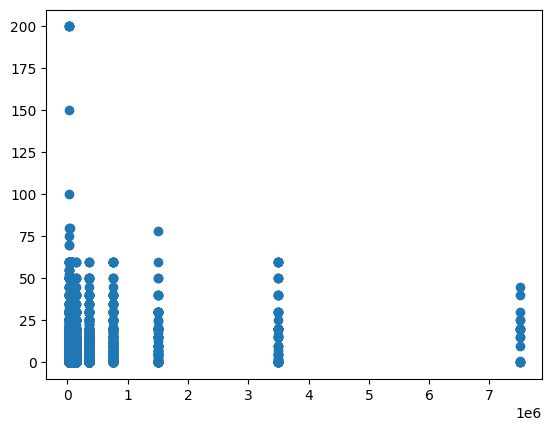

In [42]:
aux_index_array = rpg_games_data4['average_estimated_owners_number'][rpg_games_data4['average_estimated_owners_number'] < 15000000].index
plt.scatter(rpg_games_data4['average_estimated_owners_number'][aux_index_array], rpg_games_data4['release_price'][aux_index_array])

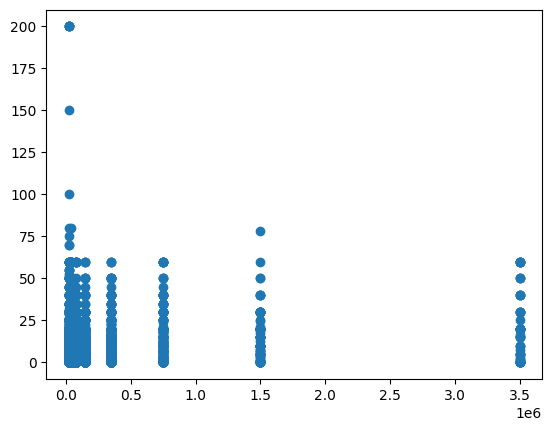

In [43]:
aux_index_array = rpg_games_data4['average_estimated_owners_number'][rpg_games_data4['average_estimated_owners_number'] < 4000000].index
plt.scatter(rpg_games_data4['average_estimated_owners_number'][aux_index_array], rpg_games_data4['release_price'][aux_index_array])

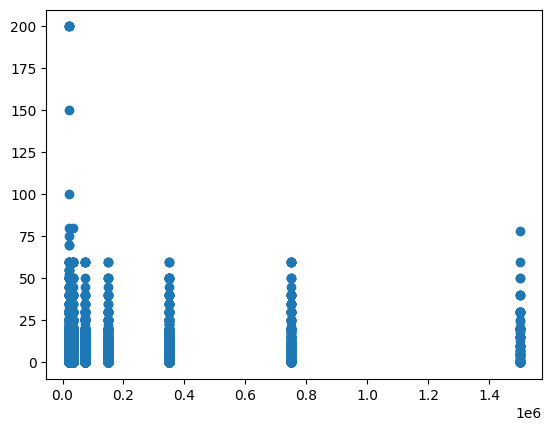

In [44]:
aux_index_array = rpg_games_data4['average_estimated_owners_number'][rpg_games_data4['average_estimated_owners_number'] < 2000000].index
plt.scatter(rpg_games_data4['average_estimated_owners_number'][aux_index_array], rpg_games_data4['release_price'][aux_index_array])

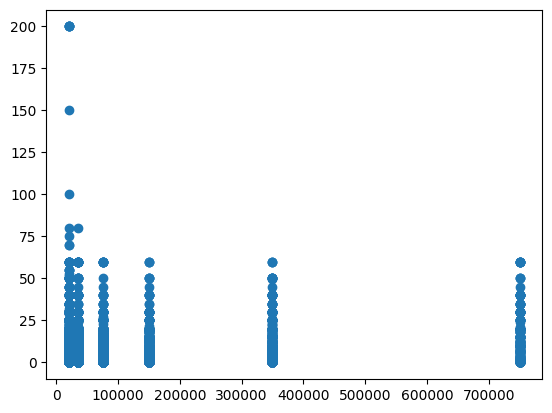

In [45]:
aux_index_array = rpg_games_data4['average_estimated_owners_number'][rpg_games_data4['average_estimated_owners_number'] < 800000].index
plt.scatter(rpg_games_data4['average_estimated_owners_number'][aux_index_array], rpg_games_data4['release_price'][aux_index_array])

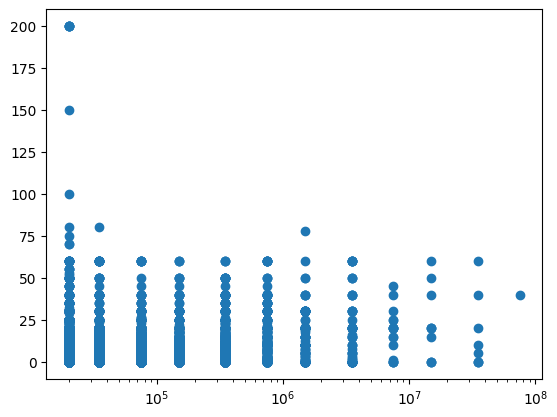

In [46]:
# conclusão de que podemos colocar nossa variável x em escala logarítmica, dado o comportamento dos plots em zoom ins progressivos

fig, ax = plt.subplots()

ax.scatter(rpg_games_data4['average_estimated_owners_number'], rpg_games_data4['release_price'])
ax.set_xscale("log")

### 4.2.2 release_price/average_estimated_owners_number

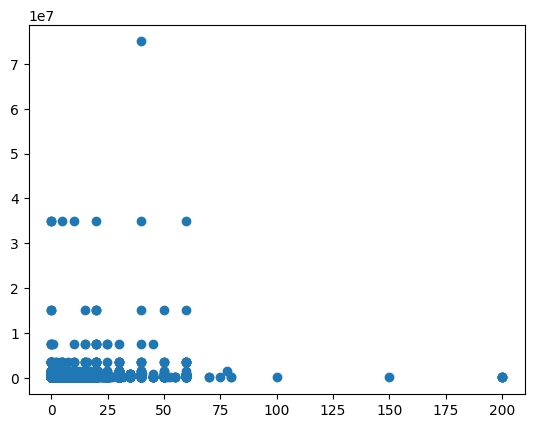

In [47]:
plt.scatter(rpg_games_data4['release_price'], rpg_games_data4['average_estimated_owners_number'])

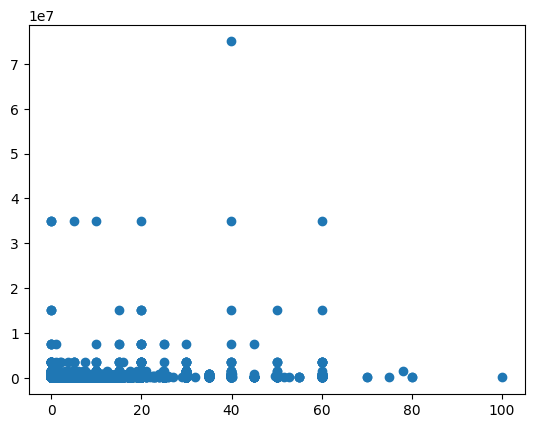

In [48]:
aux_index_array = rpg_games_data4['release_price'][rpg_games_data4['release_price'] < 100].index
plt.scatter(rpg_games_data4['release_price'][aux_index_array], rpg_games_data4['average_estimated_owners_number'][aux_index_array])

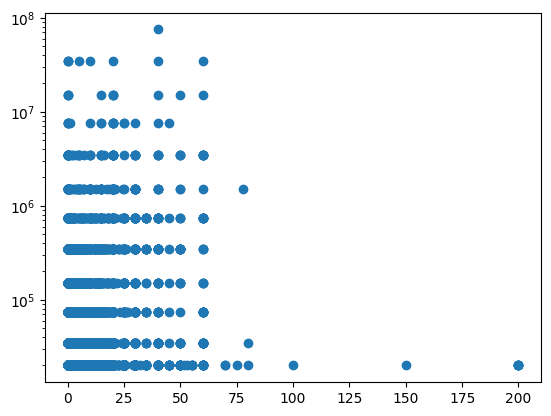

In [49]:
fig, ax = plt.subplots()

ax.scatter(rpg_games_data4['release_price'], rpg_games_data4['average_estimated_owners_number'])
ax.set_yscale("log")

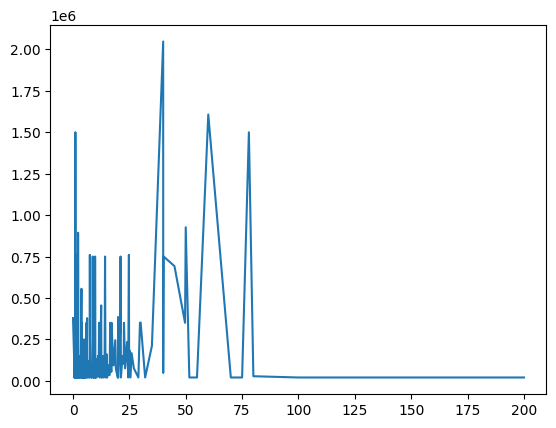

In [50]:
# plotaremos preço versus média de compradores por valor de preço

price_values = rpg_games_data4['release_price'].unique()
price_values.sort()

mean_owners_per_price = []

for price in price_values:
    mean_owners = rpg_games_data4.loc[rpg_games_data4['release_price'] == price]['average_estimated_owners_number'].mean()
    mean_owners_per_price.append(mean_owners)

plt.plot(price_values, mean_owners_per_price)

### 4.2.3 recurrent_developers/release_price

[Text(1, 0, '0')]

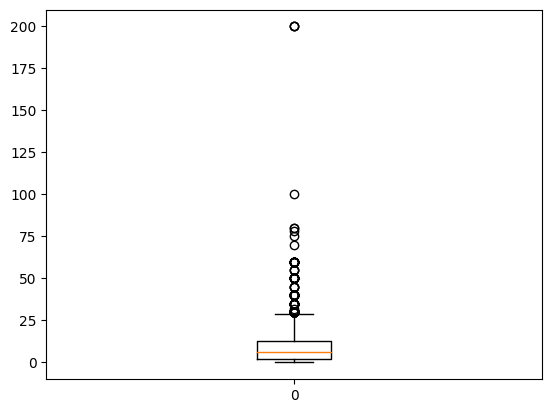

In [51]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 0]['release_price'])
ax.set_xticklabels([0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96abd21660>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96abd21120>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96abd23850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96abd20be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96abd209d0>],
 'means': []}

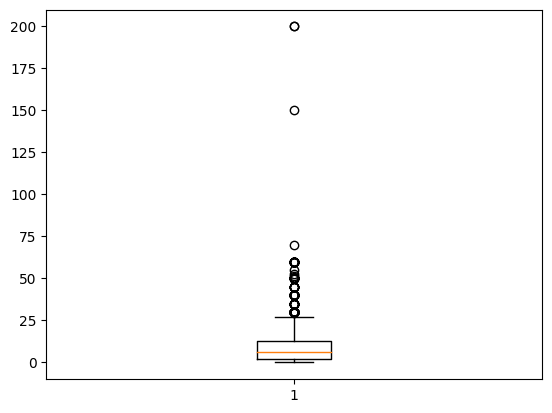

In [52]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 1]['release_price'])

[Text(1, 0, '0'), Text(2, 0, '1')]

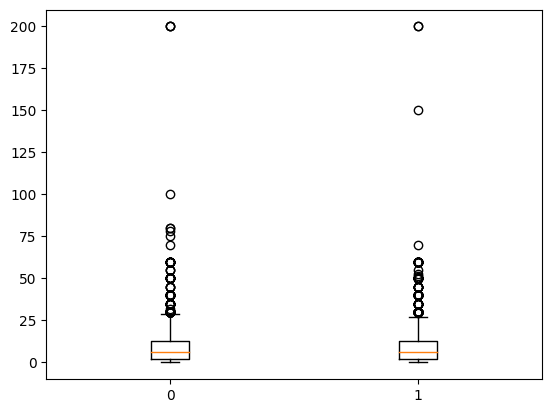

In [53]:
fig, ax = plt.subplots()

ax.boxplot([rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 0]['release_price'],rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 1]['release_price']])
ax.set_xticklabels([0,1])

### 4.2.4 recurrent_developers/average_estimated_owners_number

[Text(1, 0, '0')]

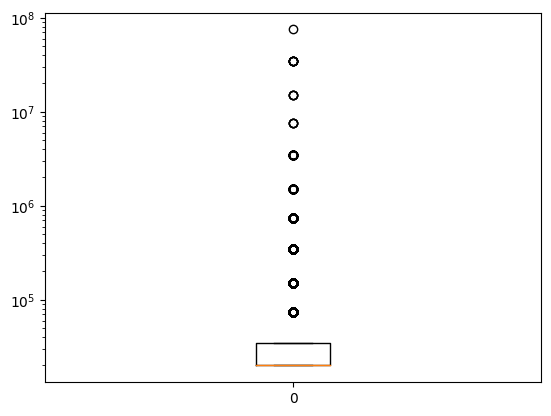

In [54]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 0]['average_estimated_owners_number'])
ax.set_yscale("log")
ax.set_xticklabels([0])

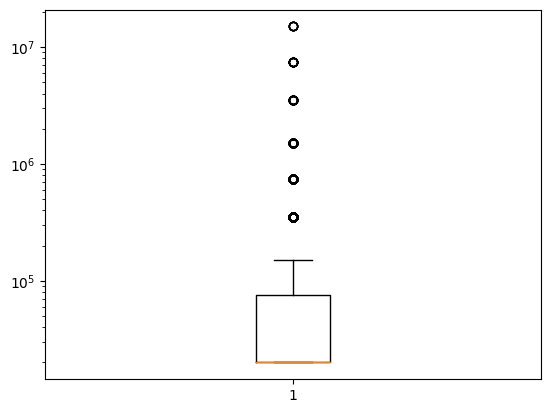

In [55]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 1]['average_estimated_owners_number'])
ax.set_yscale("log")

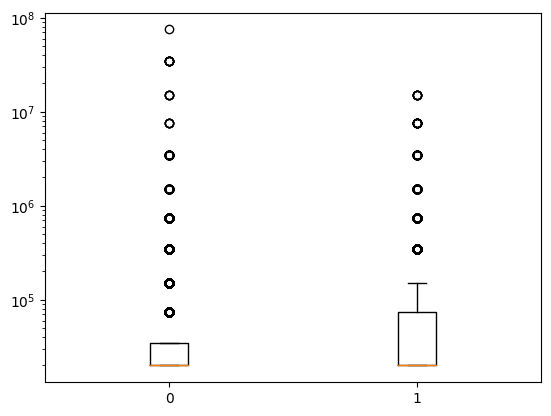

In [56]:
fig, ax = plt.subplots()

ax.boxplot([rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 0]['average_estimated_owners_number'],rpg_games_data4.loc[rpg_games_data4['recurrent_developers'] == 1]['average_estimated_owners_number']])
ax.set_xticklabels([0,1])
ax.set_yscale("log")

### 4.2.5 sales_perfomance/release_price

[Text(1, 0, '0')]

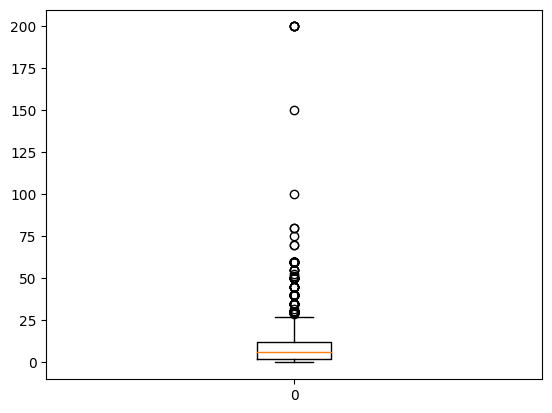

In [57]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['release_price'])
ax.set_xticklabels([0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96ab50b610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96ab50bb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96ab50b370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96ab5400d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96ab540370>],
 'means': []}

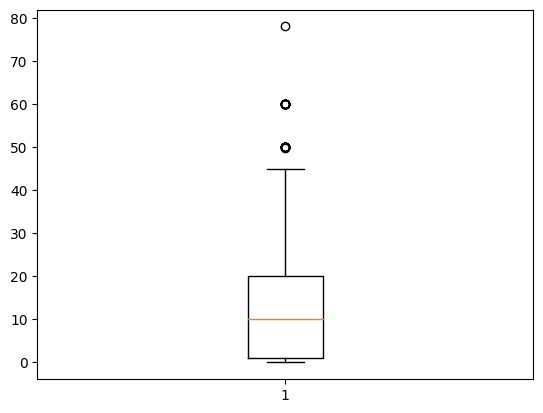

In [58]:
plt.boxplot(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['release_price'])

[Text(1, 0, '0'), Text(2, 0, '1')]

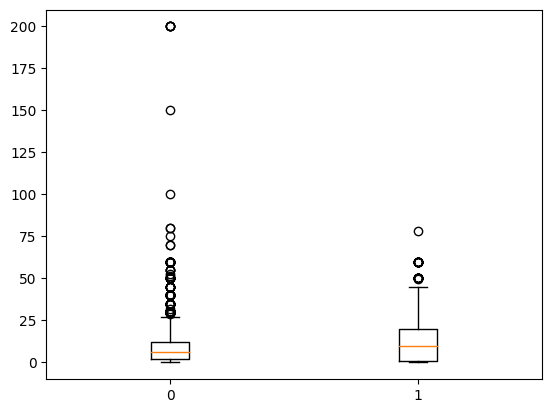

In [59]:
fig, ax = plt.subplots()

ax.boxplot([rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['release_price'],rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['release_price']])
ax.set_xticklabels([0,1])

### 4.2.6 sales_perfomance/average_estimated_owners_number

[Text(1, 0, '0')]

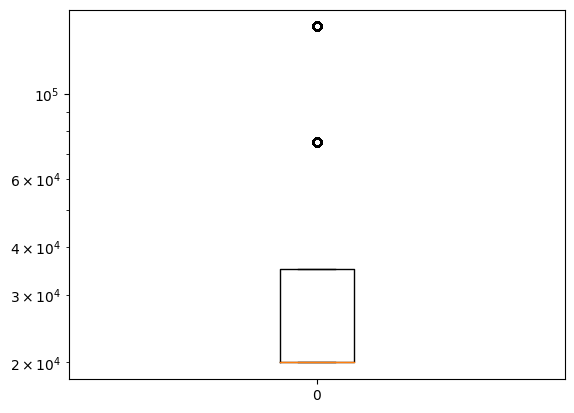

In [60]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['average_estimated_owners_number'])
ax.set_yscale("log")
ax.set_xticklabels([0])

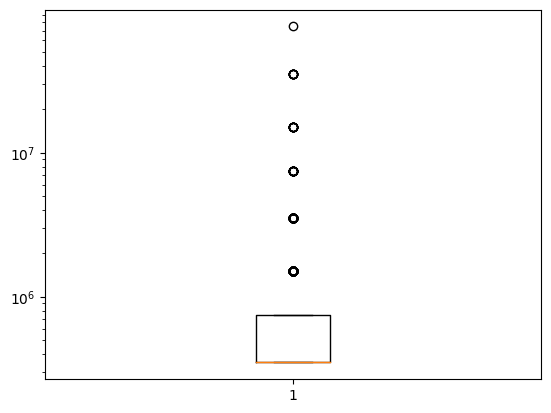

In [61]:
fig, ax = plt.subplots()

ax.boxplot(rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number'])
ax.set_yscale("log")

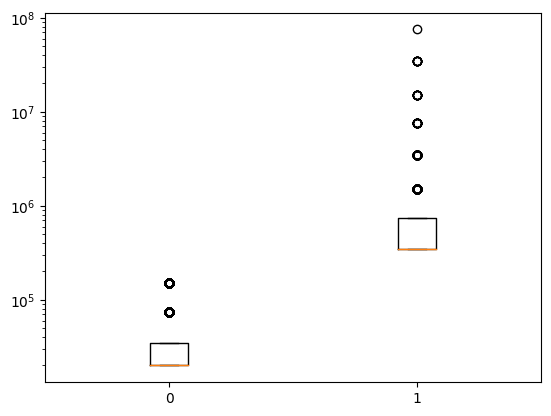

In [62]:
fig, ax = plt.subplots()

ax.boxplot([rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 0]['average_estimated_owners_number'],rpg_games_data4.loc[rpg_games_data4['sales_performance'] == 1]['average_estimated_owners_number']])
ax.set_xticklabels([0,1])
ax.set_yscale("log")

### 4.2.7 quarter/release_price

[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')]

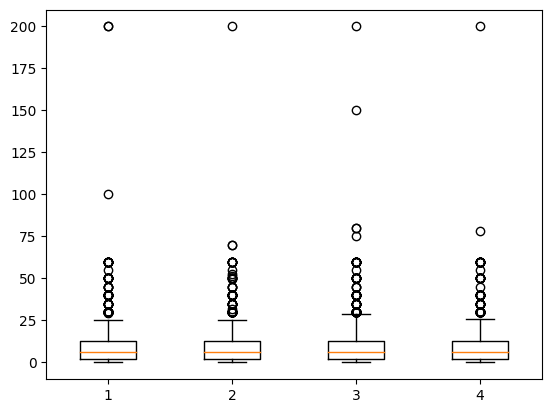

In [63]:
fig, ax = plt.subplots()

ax.boxplot([rpg_games_data4.loc[rpg_games_data4['quarter'] == 1]['release_price'], rpg_games_data4.loc[rpg_games_data4['quarter'] == 2]['release_price'],rpg_games_data4.loc[rpg_games_data4['quarter'] == 3]['release_price'],rpg_games_data4.loc[rpg_games_data4['quarter'] == 4]['release_price']])
ax.set_xticklabels([1,2,3,4])

In [64]:
med1 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 1]['release_price'])
med2 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 2]['release_price'])
med3 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 3]['release_price'])
med4 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 4]['release_price'])

print(med1, med2, med3, med4)

9.060687111801244 8.887746204748929 9.09412937062937 8.88568676716918


### 4.2.8 quarter/average_estimated_owners_number

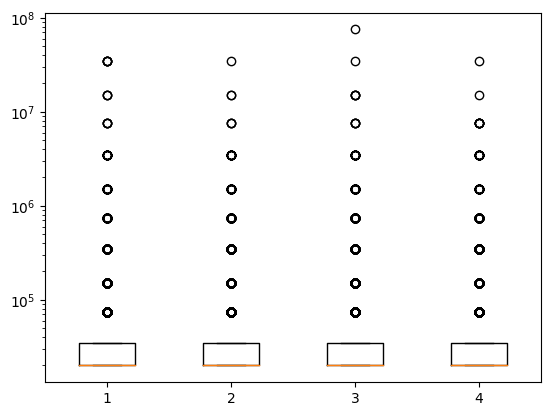

In [65]:
fig, ax = plt.subplots()

ax.boxplot([rpg_games_data4.loc[rpg_games_data4['quarter'] == 1]['average_estimated_owners_number'], rpg_games_data4.loc[rpg_games_data4['quarter'] == 2]['average_estimated_owners_number'],rpg_games_data4.loc[rpg_games_data4['quarter'] == 3]['average_estimated_owners_number'],rpg_games_data4.loc[rpg_games_data4['quarter'] == 4]['average_estimated_owners_number']])
ax.set_xticklabels([1,2,3,4])
ax.set_yscale("log")

In [66]:
med1 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 1]['average_estimated_owners_number'])
med2 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 2]['average_estimated_owners_number'])
med3 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 3]['average_estimated_owners_number'])
med4 = np.mean(rpg_games_data4.loc[rpg_games_data4['quarter'] == 4]['average_estimated_owners_number'])


std1 = np.std(rpg_games_data4.loc[rpg_games_data4['quarter'] == 1]['average_estimated_owners_number'])
std2 = np.std(rpg_games_data4.loc[rpg_games_data4['quarter'] == 2]['average_estimated_owners_number'])
std3 = np.std(rpg_games_data4.loc[rpg_games_data4['quarter'] == 3]['average_estimated_owners_number'])
std4 = np.std(rpg_games_data4.loc[rpg_games_data4['quarter'] == 4]['average_estimated_owners_number'])

print(med1, med2, med3, med4)
print(std1,std2,std3,std4)

193559.78260869565 139431.6854807318 176865.38461538462 157717.7554438861
1674378.9356605643 906304.2191157016 1698773.8763377687 942610.7454779196


### 4.2.9 time/release_price

Plotando a média de preço por ano ao longo dos anos.

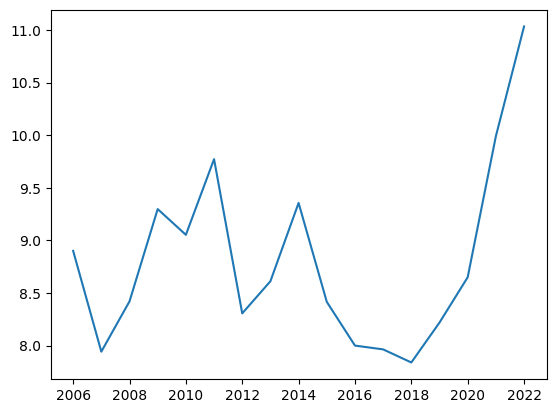

In [67]:
year_loop_array = np.arange(rpg_games_data4['release_date'].dt.year.min(), rpg_games_data4['release_date'].dt.year.max())
mean_price_per_year = data_assembly_per_year(rpg_games_data4, year_loop_array, rpg_games_data4['release_date'].dt.year, rpg_games_data4['release_price'])
filled = pd.Series(mean_price_per_year).fillna(limit=2, method='ffill')
plt.plot(year_loop_array, filled)

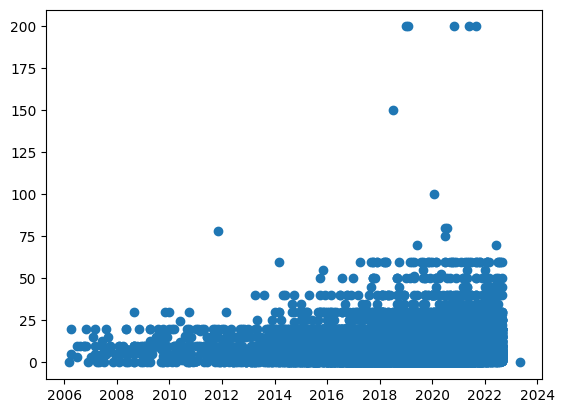

In [68]:
plt.plot_date(rpg_games_data4['release_date'], rpg_games_data4['release_price'])

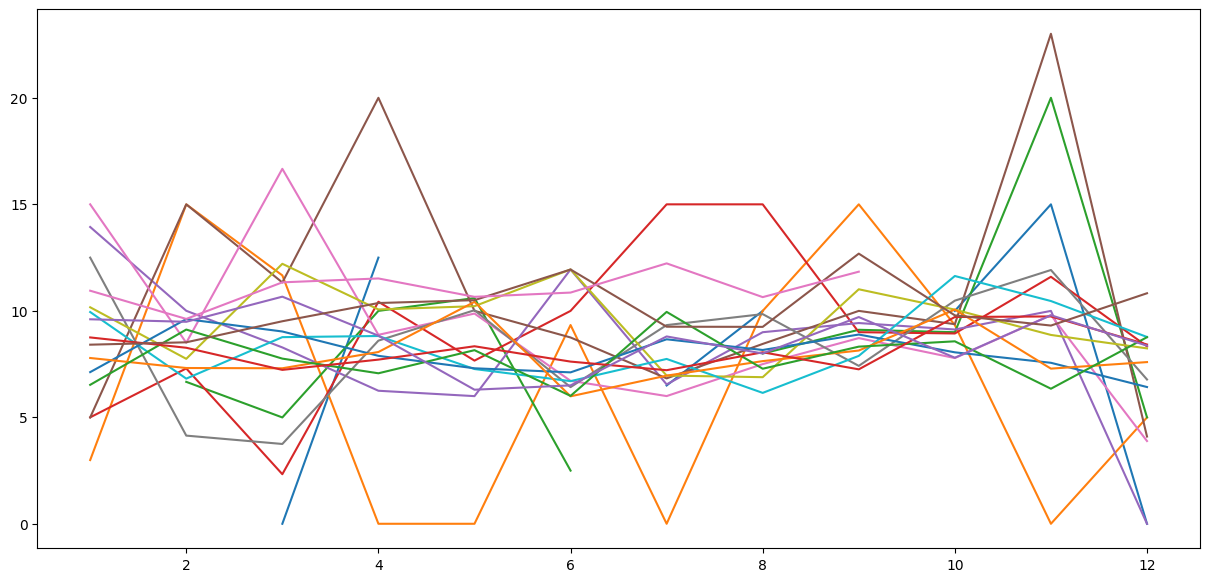

In [69]:
plot_multiple_years(rpg_games_data4, rpg_games_data4['release_price'].name, year_loop_array)

### 4.2.10 time/average_estimated_owners_number

Plotando a média de compradores por ano ao longo dos anos.

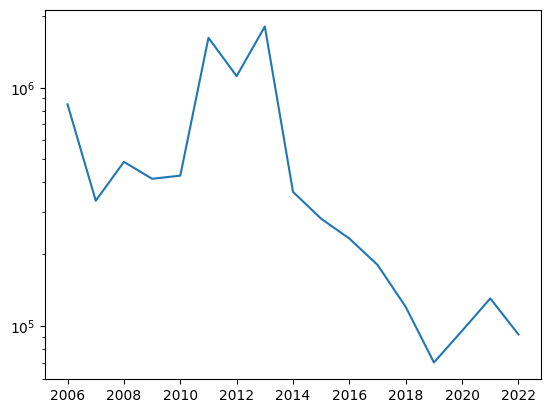

In [70]:
year_loop_array = np.arange(rpg_games_data4['release_date'].dt.year.min(), rpg_games_data4['release_date'].dt.year.max())
avg_owners_per_year = data_assembly_per_year(rpg_games_data4, year_loop_array, rpg_games_data4['release_date'].dt.year, rpg_games_data4['average_estimated_owners_number'])
filled = pd.Series(avg_owners_per_year).fillna(limit=2, method='ffill')

# faz sentido "logificar" a média?

fig, ax = plt.subplots()
ax.plot(year_loop_array, filled)
ax.set_yscale('log')

#plt.plot(year_loop_array, filled) # plot sem escala log

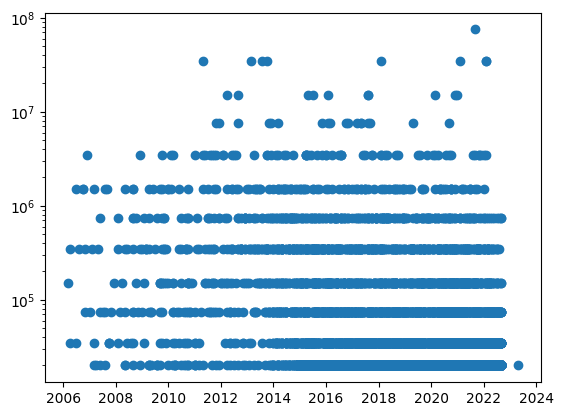

In [71]:
fig, ax = plt.subplots()
ax.plot_date(rpg_games_data4['release_date'], rpg_games_data4['average_estimated_owners_number'])
ax.set_yscale('log')

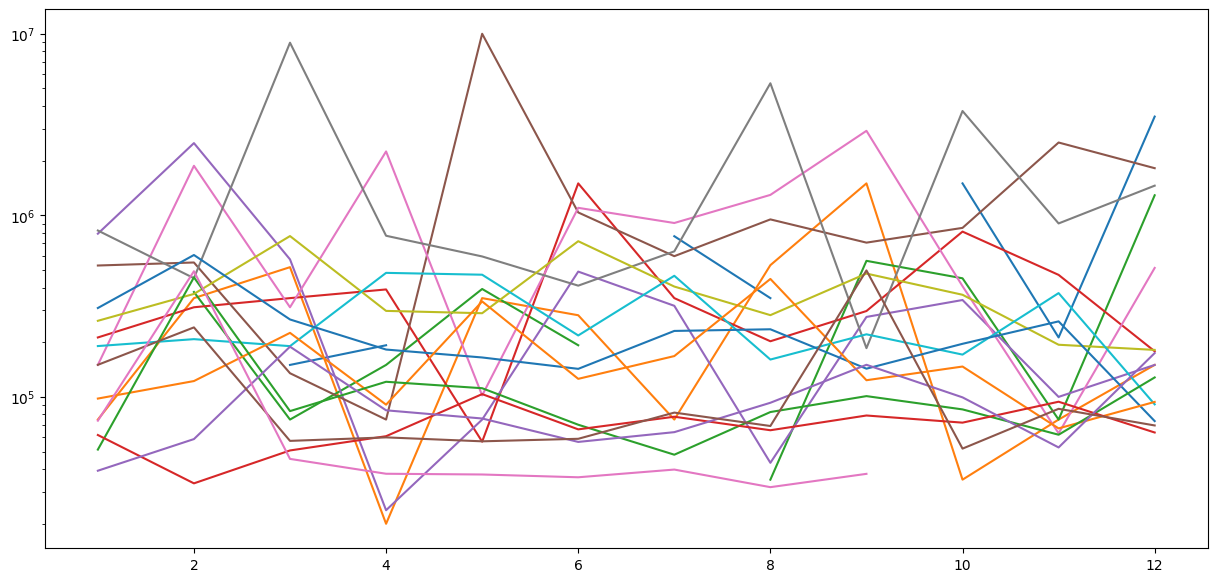

In [72]:
plot_multiple_years(rpg_games_data4, rpg_games_data4['average_estimated_owners_number'].name, year_loop_array)

### 4.2.11 Some Preliminary Conclusions

- parece ser o caso de que quanto maior o preço, menor a chance do jogo performar mal
- desenvolvedores recorrentes tem uma chance maior de vender mais
- jogos que venderam bem perfomam consideravelmente acima da média
- o preço médio dos jogos por ano parece estar aumentando
- não parece haver relação entre o trimestre e o número de vendas e/ou preço

## 4.3 Multivariate Analysis

Aqui plotaremos matrizes de correlação entre as variáveis do _dataset_.

In [73]:
num_attributes = rpg_games_data4.select_dtypes(include=['float64']) # cria um df satisfazendo as condições dos parênteses
num_attributes.drop('recurrent_developers', axis=1, inplace=True)

matriz_correlacao = num_attributes.corr()
matriz_correlacao.style.background_gradient(cmap='coolwarm')

,release_price,average_estimated_owners_number
release_price,1.000000,0.081213
average_estimated_owners_number,0.081213,1.000000


In [74]:
num_attributes = rpg_games_data4.select_dtypes(include=['int64','float64'])
num_attributes.drop('steam_id_number', axis=1, inplace=True)


matriz_correlacao = num_attributes.corr()
matriz_correlacao.style.background_gradient(cmap='coolwarm')

,release_price,average_estimated_owners_number,quarter,sales_performance,recurrent_developers
release_price,1.000000,0.081213,-0.003120,0.138293,0.019339
average_estimated_owners_number,0.081213,1.000000,-0.005493,0.301942,0.010180
quarter,-0.003120,-0.005493,1.000000,0.027855,0.011615
sales_performance,0.138293,0.301942,0.027855,1.000000,0.096794
recurrent_developers,0.019339,0.010180,0.011615,0.096794,1.000000


## 4.4 Verified Hypothesis

Lista de algumas hipóteses validadas:

- o preço dos jogos aumenta conforme os anos passam;
- quanto maior o preço, maior o número de vendas (correlação de 8%).

Conclusões e _insights_:

- 9,3% dos jogos perfomaram acima da média, em termos de venda;
- a distribuição de preços para jogos que perfomaram bem parece se comportar como a geral, com alguma diferença de curtose/achatamento;
- a média de preço dos jogos que perfomaram bem é cerca de 47% maior que a média total;
- dentre os que perfomaram bem, o menor valor de cópias vendidas para um jogo é de 350k. Isso representa uma diferença de +106% em relação à média;
- a chance de um jogo perfomar bem está positivamente relacionada com o preço de lançamento, e com o estúdio ser ou não um desenvolvedor recorrente.


# 5.0 Data Preparation

In [75]:
rpg_games_data5 = rpg_games_data4.copy()
rpg_games_data5.to_csv(HOME_PATH + INTERIM_DATA_PATH + 'rpg_games_data5.csv')

## 5.1 Normalization

(array([9.694e+03, 5.760e+02, 1.100e+02, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 5.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

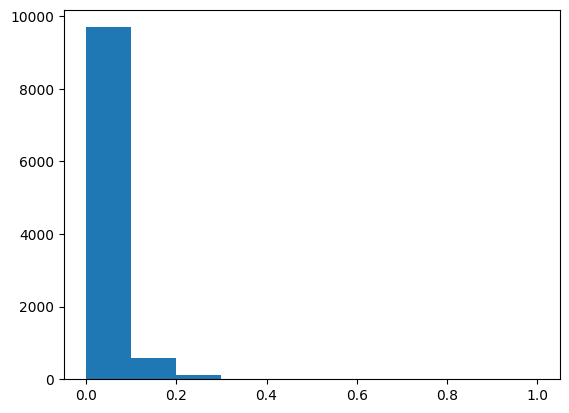

In [76]:
rpg_games_data5['normalized_price'] = rpg_games_data5['release_price'].apply(lambda x: (x/199.99))

plt.hist(rpg_games_data5['normalized_price'])

## 5.2 Standardization

(array([9.694e+03, 5.760e+02, 1.100e+02, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 5.000e+00]),
 array([-0.87263102,  1.07194766,  3.01652634,  4.96110502,  6.9056837 ,
         8.85026239, 10.79484107, 12.73941975, 14.68399843, 16.62857711,
        18.57315579]),
 <BarContainer object of 10 artists>)

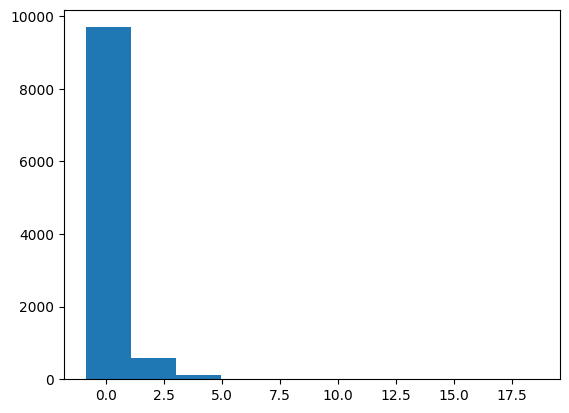

In [77]:
rpg_games_data5['standardized_price'] = rpg_games_data5['release_price'].apply(lambda x: ((x-8.974565)/10.28449))

plt.hist(rpg_games_data5['standardized_price'])

## 5.3 Transformation

Devido à presença de vários _outliers_, vamos aplicar uma transformação logarítmica sobre a variável average_estimated_owners_number.

(array([8074.,  832.,  524.,  490.,  247.,  122.,   67.,   18.,   10.,
           9.]),
 array([4.30103   , 4.65843312, 5.01583625, 5.37323938, 5.7306425 ,
        6.08804563, 6.44544876, 6.80285188, 7.16025501, 7.51765814,
        7.87506126]),
 <BarContainer object of 10 artists>)

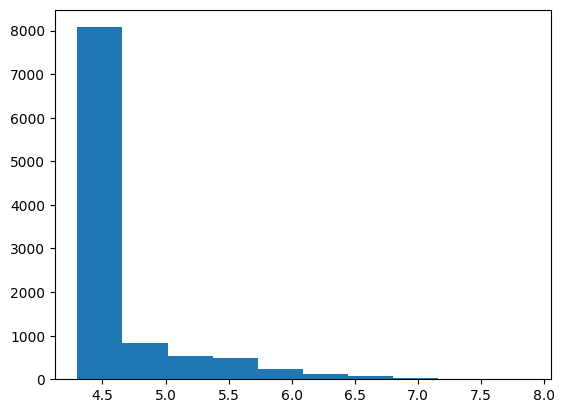

In [78]:
rpg_games_data5['log_aeon'] = np.log10(rpg_games_data5['average_estimated_owners_number'])
plt.hist(rpg_games_data5['log_aeon'])

# TESTES E RASCUNHOS

In [79]:
rpg_games_data5['log_aeon'].skew()

2.255954049565036

In [80]:
rpg_games_data5['average_estimated_owners_number'].median()

20000.0

In [81]:
rpg_games_data5['average_estimated_owners_number'].mean()

167350.62061002597

In [82]:
rpg_games_data5['log_aeon'].median()

4.301029995663981

In [83]:
rpg_games_data5['log_aeon'].mean()

4.568799571862696

In [84]:
a = rpg_games_data5.loc[rpg_games_data5['release_price'] == 0]
a

,steam_id_number,release_price,average_estimated_owners_number,quarter,sales_performance,recurrent_developers,release_date,normalized_price,standardized_price,log_aeon
23,24,0.0,750000.0,3,1,1.0,2022-08-01,0.0,-0.872631,5.875061
41,42,0.0,350000.0,2,1,0.0,2016-04-01,0.0,-0.872631,5.544068
60,61,0.0,3500000.0,2,1,1.0,2012-06-01,0.0,-0.872631,6.544068
67,68,0.0,35000000.0,4,1,0.0,2013-10-01,0.0,-0.872631,7.544068
83,84,0.0,7500000.0,4,1,1.0,2011-12-01,0.0,-0.872631,6.875061
...,...,...,...,...,...,...,...,...,...,...
9808,9809,0.0,35000.0,2,0,1.0,2022-05-01,0.0,-0.872631,4.544068
10023,10024,0.0,20000.0,4,0,0.0,2019-10-01,0.0,-0.872631,4.301030
10048,10049,0.0,35000.0,3,0,1.0,2019-08-01,0.0,-0.872631,4.544068
10146,10147,0.0,20000.0,2,0,0.0,2022-05-01,0.0,-0.872631,4.301030


In [85]:
a.loc[a['sales_performance'] == 1]

,steam_id_number,release_price,average_estimated_owners_number,quarter,sales_performance,recurrent_developers,release_date,normalized_price,standardized_price,log_aeon
23,24,0.0,750000.0,3,1,1.0,2022-08-01,0.0,-0.872631,5.875061
41,42,0.0,350000.0,2,1,0.0,2016-04-01,0.0,-0.872631,5.544068
60,61,0.0,3500000.0,2,1,1.0,2012-06-01,0.0,-0.872631,6.544068
67,68,0.0,35000000.0,4,1,0.0,2013-10-01,0.0,-0.872631,7.544068
83,84,0.0,7500000.0,4,1,1.0,2011-12-01,0.0,-0.872631,6.875061
...,...,...,...,...,...,...,...,...,...,...
2071,2072,0.0,15000000.0,3,1,1.0,2017-08-01,0.0,-0.872631,7.176091
2453,2454,0.0,350000.0,4,1,1.0,2019-10-01,0.0,-0.872631,5.544068
2589,2590,0.0,1500000.0,3,1,0.0,2021-07-01,0.0,-0.872631,6.176091
2636,2637,0.0,750000.0,3,1,0.0,2021-07-01,0.0,-0.872631,5.875061
